<center><font size="16">Human Resource Analysis</font></center>

Companies want to improve and maintain a healthy relationship and environment for their employees. This can be achieved by recognizing and understanding the important factors that are associated with employee turnover and taking care of them might add into the productivity and growth of the employees. These insights can help managers for grabing the opportunity to take corrective steps to build and preserve their successful business. 
<br><br>
In this notebook, we will work on the project that is based on understanding what factors contributed most to employee turnover and to create a model that can predict if a certain employee will leave the company or not.<br><br>

### Column Description

- satisfacion_level: Showing satisfaction of a particular employee
- last_evaluation: Showing last evaluation of a particular employee
- number_project: Showing number of projects handled a particular employee
- average_montly_hours: Showing the monthly hours that were spent the particular emloyee
- time_spend_company: Shows the number of years spent by the particular employee in the company.
- Work_accident: Showing an employee has whether been part of the company or not.
- left: Tells either and employee has left the company or not. Shows two values 0= not left, 1= left
- promotion_last_5years: Shows that the whether the employee has got any promotion in the last 5 years or not.
- dept: Shows the departments
- salary: Shows the salary type of the employee

# Wrangling & EDA

## 1. Loading Packages

In [2]:
#Write code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

## 2. Loading Data & Basic Analysis

- **Task 1**:Load the data and after making a copy of it, find **shape, data types, basic statistics, and null values** from the data set

In [3]:
# Load the data
data= pd.read_csv('HR_comma_sep.csv')
df= data.copy()

In [4]:
# Find the shape
df.shape

(14999, 10)

In [5]:
# Display the top 5 rows.
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
# Find the data types of columns
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
dept                      object
salary                    object
dtype: object

In [7]:
# Find the basic statistics
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [8]:
# Find the null values
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
dept                     0
salary                   0
dtype: int64

# 3. Exploration

Before moving ahead, let us check the details of different variables in the data

**Task 2: Find out the how many employees left the company?**

In [9]:
# Count of how many employees left the company
df['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

**Question:What can you interpret from the plot above?** 

Answer: 3571 employees left the company

**Task 3: Find out the number of projects being handled.**

In [10]:
# Write code here
df['number_project'].unique()

array([2, 5, 7, 6, 4, 3], dtype=int64)

**Question: What insights can you infer from the above plot?**

Answer: there are 6 different projects being handled

**Task 4: Find out how number of projects contributed to employee turn-over.**
<br>
<br>

In [11]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


**Task 5:** Make a plot of your findings (only turn-over employees)

<AxesSubplot:xlabel='number_project', ylabel='count'>

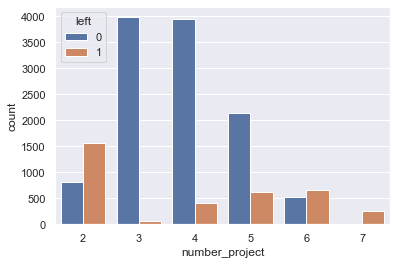

In [12]:
sns.countplot(x='number_project', hue = 'left', data=df)

**Question: What can you conclude from the above graph? Which people are leaving the company(as per number of projects)? What can be the reasons behind?**

Answer: most people from project 2 are leaving and very less from project 3 are leaving

## **Time spent at the company**

**Task 6: Find out how time spend at company can lead to employee turn over. Show the following plots.**<br>
- Count of Number of years spent by employees.
- After how many years are mostly employees leaving the company? 

*Hint: For the second part do the similar procedure as done in case of 'number_projects' above. Try to find the **percetage** to show that after how much time/years did most of employees exactly leave.*

<AxesSubplot:xlabel='time_spend_company', ylabel='count'>

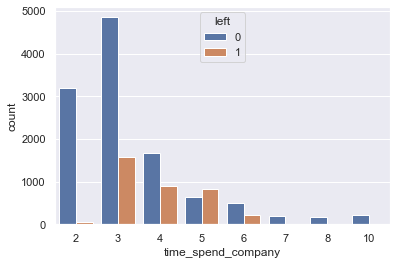

In [13]:
# Show the plot for the count of years here
sns.countplot(x='time_spend_company',hue='left', data = df)

**Question: What is the maximum number of time spend by the employees?**

Answer: 10 years

In [14]:
# Write the code here to get the percentage of employees leaving.
df['left'].value_counts(normalize=True) * 100

0    76.191746
1    23.808254
Name: left, dtype: float64

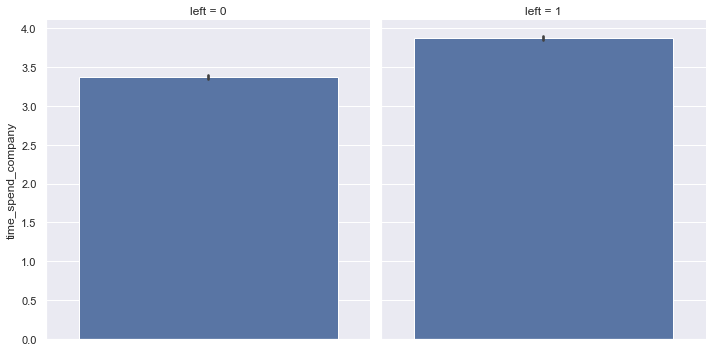

In [15]:
# Write the code here to draw a bar plot showing years after which employees are likely to leave
sns.catplot(y='time_spend_company', col = 'left', data=df, kind='bar')

**Question: After what time period are employees most likely to leave the company ?**

Answer: 3.4 years

## **Employees engaged in any work accident**

**Task 7: Find out that how many employees were engaged in work accident and how many of them actually left? Use count plots to show your results**

<AxesSubplot:xlabel='Work_accident', ylabel='count'>

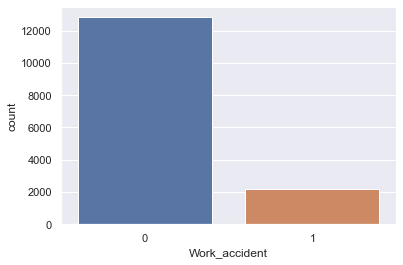

In [16]:
# Number of employees involved in work accident
sns.countplot(x='Work_accident', data = df)

**Question: What can you conclude from the graph above?**

Answer: around 2000 people were involved in work accident

<AxesSubplot:xlabel='Work_accident', ylabel='count'>

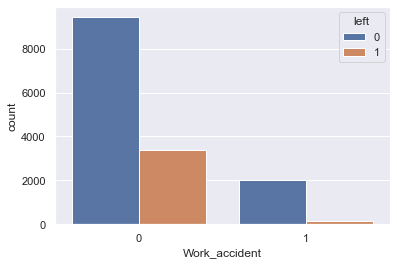

In [17]:
# Number of employees involved in work accident and left or not left
sns.countplot(x='Work_accident',hue='left', data = df)

## **Promotions in last 5 years**

**Task 8: How many number of employees got the promotion in last 5 year and how many of them left?**

In [18]:
# Write code
df['promotion_last_5years'].value_counts()

0    14680
1      319
Name: promotion_last_5years, dtype: int64

Answer: 319 employees

## **Salary trends**

**Task 9: What are the salary trends in the data? Use graphical representation for explanation**

In [19]:
#Write code here
df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

Answer: most of the employees have low to medium salary

**Quesion: Which type salary holders are most likely to leave? Try to show the percentage of employees who left according to their salaries, using a bar plot or as you like.**

In [20]:
# Write code here
group=df.groupby(['salary'])['satisfaction_level'].mean().reset_index()
group

,salary,satisfaction_level
0,high,0.637470
1,low,0.600753
2,medium,0.621817


<AxesSubplot:xlabel='salary', ylabel='satisfaction_level'>

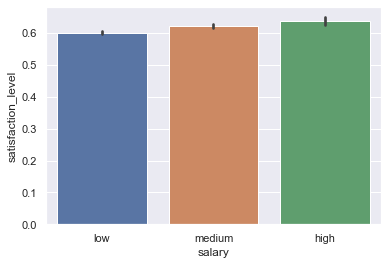

In [21]:
# Write code here for plot
sns.barplot(y='satisfaction_level', x="salary", data=df)

**Question: What does the above plot show?**

Answer: employees with higher salary are the most satisfied

## **Employees per Department**

**Task 10: Find out employees per department and also see which which department has highest number of employees leaving the company.**

In [22]:
# Write the code here to check employee count in each department. You can use a graphical representation or use simple code to check.
df['dept'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: dept, dtype: int64

**Question: Which department has maximum number of employees?**

Answer: sales

**Question: Which department has highest percentage of turn-over? Use graphical representation to find out.**

In [23]:
# Write code here
turnover=df.groupby('dept')['left'].sum()
turnover

dept
IT              273
RandD           121
accounting      204
hr              215
management       91
marketing       203
product_mng     198
sales          1014
support         555
technical       697
Name: left, dtype: int64

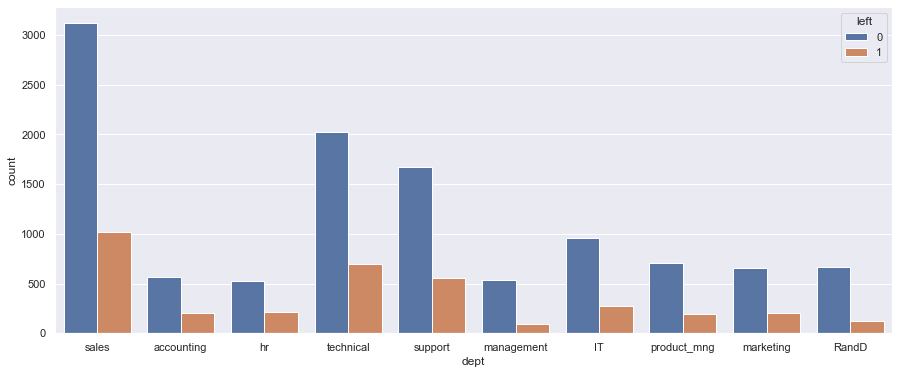

In [24]:
# Write code here to draw the plot
plt.figure(figsize=(15,6))
sns.countplot(x='dept', hue='left', data= df)
plt.show()

Answer: most employees turnover is from sales dept but the highest rate is of HR dept

## **Satisfaction Level**

**Task 11: Show the satisfaction level of employees who left the company and those who didn't leave, using a kde plot**

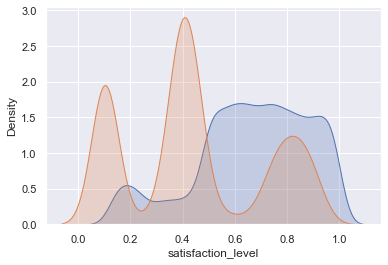

In [25]:
# Write the code here
sns.kdeplot(df[df['left'] == 0]['satisfaction_level'], shade=True,label="stayed");
sns.kdeplot(df[df['left'] == 1]['satisfaction_level'], shade=True,label="left");

**Question: What can you conclude from the plot above?**

Answer: employees with less satisfaction level left

# Feature Engineering

For feature engineering we will two new features. Looking at the the satisfcation we can conclude that people who are leaving have a low satisfaction level, most likely below 0.5 are leaving and people having a high satisfaction_level, most likely above 0.5 are likely to stay. 

**Task 12: Make a new feature 'satisfaction_level_type' through following conditions:**<br>
- **satisfaction_level >= 0.5 then satisfaction_level_type = 'High'**
- **satisfaction_level < 0.5 then satisfaction_level_type = 'Low'**

In [26]:
# Write the code here to make bins as mentioned above
df['satisfaction_level_type'] = ''
df.loc[df['satisfaction_level']<0.5, 'satisfaction_level_type'] = 'Low'
df.loc[df['satisfaction_level']>=0.5, 'satisfaction_level_type'] = 'High'
df[['satisfaction_level', 'satisfaction_level_type']].head()

,satisfaction_level,satisfaction_level_type
0,0.38,Low
1,0.80,High
2,0.11,Low
3,0.72,High
4,0.37,Low


**Task 13: Make a count plot for satisfaction_level_type and and see which type has more turn over using hue='left'**

<AxesSubplot:xlabel='satisfaction_level_type', ylabel='count'>

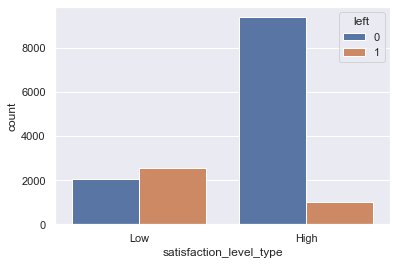

In [27]:
# Write Code Here
sns.countplot(x="satisfaction_level_type",hue='left', data=df)

Previously we saw that employees having high number of projects are leaving. We also saw that some employees with extremely less number of projects are also leaving the company. Let us see how number of projects and satisfaction level are related.<br>
We can see this by checking the satisfaction level type and number of projects in according to that specific type. 

In [28]:
# Write Code Here
df[['satisfaction_level_type','number_project']].head(20)

,satisfaction_level_type,number_project
0,Low,2
1,High,5
2,Low,7
3,High,5
4,Low,2
5,Low,2
6,Low,6
7,High,5
8,High,5
9,Low,2


**Make a Plot of your findings**

<AxesSubplot:xlabel='number_project', ylabel='count'>

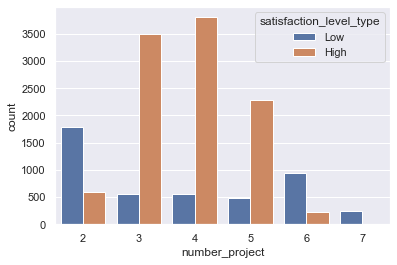

In [29]:
sns.countplot(x='number_project', hue='satisfaction_level_type', data=df)

**Question:** What did you infer drom the above plot

**Answer:** people with very less number of project i.e 2 and with more than 5 projects are not happy

Now lets check number of projects for low satisfaction level

In [30]:
# Write Code Here
df1 = (df['number_project']) & (df['satisfaction_level_type']=='Low') 
df1.head()

0    False
1    False
2     True
3    False
4    False
dtype: bool

Notice that there is are people associated with low satisfaction level, have either too less projects, i.e. number of projects = 2 or high number of projects i.e. 6 or even 7. The over all count for 7 is low but there is a significant raise if we compare its count with higher satisfaction level.

**Task 14: Make a new column 'employee_type' and assign categories as following:**<br>
- **If number of projects is equal to 2 then employee_type='unburdened'**
- **If number of projects is between 3 and 5 then employee_type = 'Satisfactory'**
- **If number of projects is 6 and above then employee_type='Burdened'**

In [31]:
df['employee_type']=''

In [32]:
# Write code here
df.loc[df['number_project']==2, 'employee_type'] = 'unburdened'
df.loc[(df['number_project']>2) & (df['number_project']<=5), 'employee_type'] = 'Satisfactory'
df.loc[df['number_project']>=6, 'employee_type'] = 'Burdened'
df[['number_project', 'employee_type']].head()

,number_project,employee_type
0,2,unburdened
1,5,Satisfactory
2,7,Burdened
3,5,Satisfactory
4,2,unburdened


**Task 15: Make a countplot to see which type of employee is leaving**

<AxesSubplot:xlabel='employee_type', ylabel='count'>

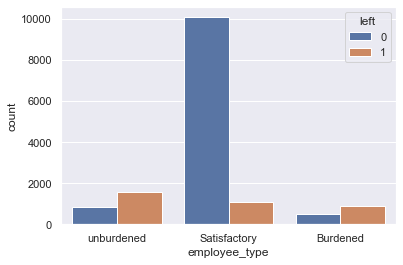

In [33]:
# Write code here
sns.countplot(x='employee_type', hue='left', data= df)

### Remove Redundant Features

Hint: Look for the columns used in Feature Engineering

In [34]:
# Write code here
df.head()
df = df.drop(['number_project','satisfaction_level' ], axis=1)

In [35]:
df.head()

,last_evaluation,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary,satisfaction_level_type,employee_type
0,0.53,157,3,0,1,0,sales,low,Low,unburdened
1,0.86,262,6,0,1,0,sales,medium,High,Satisfactory
2,0.88,272,4,0,1,0,sales,medium,Low,Burdened
3,0.87,223,5,0,1,0,sales,low,High,Satisfactory
4,0.52,159,3,0,1,0,sales,low,Low,unburdened


# Machine Learning

Before moving further, we need to apply one-hot encoding on categorical variables i.e. **dept, salary, satisfaction_level_type,** and **employee_type**

**Task 16: Do ONE HOT ENCODING of the above mentioned variables**

In [36]:
# Write code here
df_OneHot = pd.get_dummies(df, columns=['dept', 'salary', 'satisfaction_level_type', 'employee_type'])
df_OneHot.head()

,last_evaluation,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept_IT,dept_RandD,dept_accounting,dept_hr,...,dept_support,dept_technical,salary_high,salary_low,salary_medium,satisfaction_level_type_High,satisfaction_level_type_Low,employee_type_Burdened,employee_type_Satisfactory,employee_type_unburdened
0,0.53,157,3,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
1,0.86,262,6,0,1,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
2,0.88,272,4,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
3,0.87,223,5,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
4,0.52,159,3,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1


In [37]:
df = df_OneHot.copy()

**Task 17: Creating Independant and Dependant Variables**

In [38]:
# Write code here
X = df.drop(['left'], axis=1)
Y = df[['left']]

**Task 18: Perform Train Test Split with test size 30 percent and random state = 100**

In [39]:
from sklearn.model_selection import train_test_split

In [42]:
#Write code here
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size=0.30, random_state=42, shuffle=True)

In [43]:
print(xtrain.shape, ytrain.shape)
print(xtest.shape,ytest.shape)

(10499, 23) (10499, 1)
(4500, 23) (4500, 1)


**Task 19: Get the predictions using the following models.**<br>
- Random Forest
- Logistic Regression
- Ada Boost
- XG Boost

<br> 

**Also get the following scores for each of the above models**
- Accuracy
- Precision
- Recall
- F1-Score
- Classification Report

## Random Forest

In [44]:
# Importing the model from sklearn
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(random_state=42)

In [45]:
# Making instance and training the model
clf_rf.fit(xtrain, ytrain)

C:\Users\GM Enterprises\AppData\Local\Temp\ipykernel_10588\4218625600.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_rf.fit(xtrain, ytrain)


RandomForestClassifier(random_state=42)

In [46]:
# Get predictions
rf_pred = clf_rf.predict(xtest)
rf_pred_prb = clf_rf.predict_proba(xtest)[:, 1]

**Precision**

In [48]:
# Write the code to import the function for calculation of the specific score
from sklearn.metrics import precision_score

In [49]:
#Write the code to calculate
rf_precion= precision_score(ytest, rf_pred)
print("Precision: {}".format(rf_precion))

Precision: 0.9703065134099617


**Accuracy**

In [50]:
# Write the code to import the function for calculation of the specific score
from sklearn.metrics import accuracy_score

In [51]:
# Write the code to calculate
rf_acc= accuracy_score(ytest, rf_pred)
print("Accuracy: {}".format(rf_acc))

Accuracy: 0.98


**Recall**

In [52]:
# Write the code to import the function for calculation of the specific score
from sklearn.metrics import recall_score

In [53]:
# Write the code to calculate
rf_recall= recall_score(ytest, rf_pred)
print("Recall: {}".format(rf_recall))

Recall: 0.9449626865671642


**F1-Score**

In [54]:
# Write the code to import the function for calculation of the specific score
from sklearn.metrics import f1_score

In [55]:
# Write the code to calculate
rf_f1_score= f1_score(ytest, rf_pred)
print("F1 Score: {}".format(rf_f1_score))

F1 Score: 0.9574669187145558


**Classification Report**

In [57]:
# Write the code to import the function for calculation of the specific score
from sklearn.metrics import classification_report

In [58]:
#Write the code to calculate
cr = classification_report(ytest, rf_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3428
           1       0.97      0.94      0.96      1072

    accuracy                           0.98      4500
   macro avg       0.98      0.97      0.97      4500
weighted avg       0.98      0.98      0.98      4500



## Logistic Regression

In [59]:
# Import the model
from sklearn.linear_model import LogisticRegression

In [60]:
# Create instance and train, random _state=100
lr_model = LogisticRegression(random_state=42)
lr_model.fit(xtrain, ytrain)

C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [61]:
# get the predictions
lr_pred=lr_model.predict(xtest)

**Accuracy**

In [63]:
#Write the code here
lr_accuracy= accuracy_score(ytest,lr_pred)
print("Accuracy by built-in function: {}".format(lr_accuracy))

Accuracy by built-in function: 0.8588888888888889


**Precision**

In [64]:
#Write the code here
lr_precision= precision_score(ytest,lr_pred)
print("Precision by built-in function: {}".format(lr_precision))

Precision by built-in function: 0.729758149316509


**Recall**

In [65]:
#Write the code here
lr_recall= recall_score(ytest,lr_pred)
print("Recall by built-in function: {}".format(lr_recall))

Recall by built-in function: 0.6473880597014925


**F1 Score**

In [66]:
#Write the code here
lr_f1_score= f1_score(ytest,lr_pred)
print("F1 Score by built-in function: {}".format(lr_f1_score))

F1 Score by built-in function: 0.6861097380128522


**Classification Report**

In [67]:
#Write the code here
print(classification_report(ytest,lr_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      3428
           1       0.73      0.65      0.69      1072

    accuracy                           0.86      4500
   macro avg       0.81      0.79      0.80      4500
weighted avg       0.85      0.86      0.86      4500



## Ada Boost

In [68]:
#Write the code here to import the model
from sklearn.ensemble import AdaBoostClassifier

In [69]:
#Write the code here to make an instance and train the model with random state =100
clf_adb = AdaBoostClassifier(random_state=42)
clf_adb.fit(xtrain, ytrain)

C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(random_state=42)

In [70]:
# Get the predictions
pred_clf_adb=clf_adb.predict(xtest)

In [72]:
pred_prb_adb = clf_adb.predict_proba(xtest)[:, 1]

**Accuracy**

In [74]:
#Write code here
ab_accuracy= accuracy_score(ytest, pred_clf_adb)
ab_accuracy

0.9204444444444444

**Precision**

In [75]:
#Write code here
ab_precision= precision_score(ytest, pred_clf_adb)
ab_precision

0.8406488549618321

**Recall**

In [76]:
#Write code here
ab_recall= recall_score(ytest, pred_clf_adb)
ab_recall

0.8218283582089553

**F1-Score**

In [77]:
#Write code here
ab_f1_score= f1_score(ytest, pred_clf_adb)
ab_f1_score

0.8311320754716982

**Classification Report**

In [78]:
#Write code here
print(classification_report(ytest, pred_clf_adb))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      3428
           1       0.84      0.82      0.83      1072

    accuracy                           0.92      4500
   macro avg       0.89      0.89      0.89      4500
weighted avg       0.92      0.92      0.92      4500



## XG Boost

In [79]:
#Write the code here to import the model
import xgboost

In [80]:
#Write the code here to make an instance and train the model with random state =100
xgboost.XGBClassifier()
xgb = xgboost.XGBClassifier()
xgb.fit(xtrain, ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [81]:
# Get the predictions
pred_clf_xgb= xgb.predict(xtest)

**Accuracy**

In [83]:
#Write code here
xgb_accuracy= accuracy_score(ytest,pred_clf_xgb)
xgb_accuracy

0.9762222222222222

**Precision**

In [84]:
#Write code here
xgb_precision= precision_score(ytest, pred_clf_xgb)
xgb_precision

0.9599618684461392

**Recall**

In [86]:
#Write code here
xgb_recall= recall_score(ytest, pred_clf_xgb)
xgb_recall

0.9393656716417911

**F1-Score**

In [87]:
#Write code here
xgb_f1_score=f1_score(ytest, pred_clf_xgb)
xgb_f1_score

0.9495520980669495

**Classification Report**

In [88]:
#Write code here
print(classification_report(ytest, pred_clf_xgb))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3428
           1       0.96      0.94      0.95      1072

    accuracy                           0.98      4500
   macro avg       0.97      0.96      0.97      4500
weighted avg       0.98      0.98      0.98      4500



# Result Comparisons

**Task 20: Do the comparison of the above used models as per the scores found.Make a datafram that shows the models and scores for each models.**

In [89]:
# Write the code here
comparison_dict = {"Algorithm": ["Random Forest", "Logistic Regression", "Ada Boost", "XGBoost"],
                   "Accuracy": [rf_acc, lr_accuracy, ab_accuracy, xgb_accuracy],
                   "Precision": [rf_precion, lr_precision, ab_precision, xgb_precision],
                   "Recall": [rf_recall, lr_recall, ab_recall, xgb_recall],
                   "F1 Score": [rf_f1_score, lr_f1_score, ab_f1_score, xgb_f1_score]
                   }

In [90]:
comparison = pd.DataFrame(comparison_dict)
comparison.sort_values(['Recall', 'Accuracy'], ascending=False)

,Algorithm,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.980000,0.970307,0.944963,0.957467
3,XGBoost,0.976222,0.959962,0.939366,0.949552
2,Ada Boost,0.920444,0.840649,0.821828,0.831132
1,Logistic Regression,0.858889,0.729758,0.647388,0.686110


**Task 21: Which model has the best score? Do you think that you need to apply any sort of tunning on the model selected. If Yes, then apply it conclude with the final scores of the best model.**

Answer: Random Forest Model has the best score

In [93]:
from sklearn.model_selection import GridSearchCV

In [94]:
param_grid1 = {"n_estimators": [9, 18, 27, 36, 45, 54, 63],
               "max_depth": [1, 5, 10, 15, 20, 25, 30],
               "min_samples_leaf": [1, 2, 4, 6, 8, 10]}

RF = RandomForestClassifier(random_state=42)
# Instantiate the GridSearchCV object: logreg_cv
RF_cv1 = GridSearchCV(RF, param_grid1, cv=5, scoring='accuracy', n_jobs=4)

# Fit it to the data
RF_cv1.fit(xtrain, ytrain)

# RF_cv1.cv_results_,
RF_cv1.best_params_, RF_cv1.best_score_

C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:910: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


({'max_depth': 25, 'min_samples_leaf': 1, 'n_estimators': 54},
 0.9820936954105128)

In [95]:
param_grid2 = {"n_estimators": [9, 12, 15, 18, 21, 24, 27],
               "max_depth": [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
               "min_samples_leaf": [1, 2, 3, 4]}

RF = RandomForestClassifier(random_state=100)
# Instantiate the GridSearchCV object: logreg_cv
RF_cv2 = GridSearchCV(RF, param_grid2, cv=5, scoring='accuracy', n_jobs=4)

# Fit it to the data
RF_cv2.fit(xtrain, ytrain)

# RF_cv2.grid_scores_,
RF_cv2.best_params_, RF_cv2.best_score_

C:\Users\GM Enterprises\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:910: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


({'max_depth': 15, 'min_samples_leaf': 1, 'n_estimators': 24},
 0.9799031284738764)

In [96]:
RF_grid = RF_cv2.best_estimator_

In [97]:
RF_grid.fit(xtrain, ytrain)

C:\Users\GM Enterprises\AppData\Local\Temp\ipykernel_10588\4208728583.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_grid.fit(xtrain, ytrain)


RandomForestClassifier(max_depth=15, n_estimators=24, random_state=100)

In [98]:
rf_pred_t = RF_grid.predict(xtest)
rf_pred_prb_t = RF_grid.predict_proba(xtest)[:, 1]

In [102]:
print(classification_report(ytest, rf_pred_t))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3428
           1       0.97      0.93      0.95      1072

    accuracy                           0.98      4500
   macro avg       0.98      0.96      0.97      4500
weighted avg       0.98      0.98      0.98      4500

